In [76]:
%matplotlib inline

import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import glob

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten
    
from sklearn.model_selection import train_test_split
from skimage.transform import resize

In [62]:
data = pd.read_csv('Class.csv')

In [63]:
data.head()

,Label,LatinName,CommonName,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26


In [64]:
X = pd.DataFrame(columns=['Filename','Label'])
for img_name in data.Label:
    CommonName = data[data['Label'] == img_name]
    print('training\\'+img_name+'\\')
    for file_name in glob.iglob('training\\'+img_name+'\\*.*', recursive=True):
       print(file_name)
       X=X.append({'Filename':file_name,'Label':img_name},ignore_index=True)
    # img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    #X.append(img)
    
#X=np.array(X)

training\n0\
training\n0\n0018.jpg
training\n0\n0019.jpg
training\n0\n0020.jpg
training\n0\n0021.jpg
training\n0\n0022.jpg
training\n0\n0023.jpg
training\n0\n0024.jpg
training\n0\n0025.jpg
training\n0\n0026.jpg
training\n0\n0027.jpg
training\n0\n0028.jpg
training\n0\n0029.jpg
training\n0\n0030.jpg
training\n0\n0031.jpg
training\n0\n0032.jpg
training\n0\n0033.jpg
training\n0\n0034.jpg
training\n0\n0035.jpg
training\n0\n0036.jpg
training\n0\n0037.jpg
training\n0\n0038.jpg
training\n0\n0039.jpg
training\n0\n0040.jpg
training\n0\n0041.jpg
training\n0\n0042.jpg
training\n0\n0043.jpg
training\n0\n0044.jpg
training\n0\n0045.jpg
training\n0\n0046.jpg
training\n0\n0047.jpg
training\n0\n0048.jpg
training\n0\n0049.jpg
training\n0\n0050.jpg
training\n0\n0051.jpg
training\n0\n0052.jpg
training\n0\n0053.jpg
training\n0\n0110.jpg
training\n0\n0111.jpg
training\n0\n0112.jpg
training\n0\n0113.jpg
training\n0\n0114.jpg
training\n0\n0115.jpg
training\n0\n0116.jpg
training\n0\n0117.jpg
training\n0\n0118.j

training\n3\n3126.jpg
training\n3\n3127.jpg
training\n3\n3128.jpg
training\n3\n3129.jpg
training\n3\n3130.jpg
training\n3\n3131.jpg
training\n3\n3132.jpg
training\n3\n3133.jpg
training\n3\n3134.jpg
training\n3\n3135.jpg
training\n3\n3136.jpg
training\n3\n3137.jpg
training\n3\n3138.jpg
training\n3\n3139.jpg
training\n3\n3140.jpg
training\n3\n3141.jpg
training\n3\n3142.jpg
training\n3\n3143.jpg
training\n3\n3144.jpg
training\n3\n3145.jpg
training\n3\n3146.jpg
training\n3\n3147.jpg
training\n3\n3148.jpg
training\n3\n3149.jpg
training\n3\n3150.jpg
training\n3\n3151.jpg
training\n3\n3152.jpg
training\n3\n3153.jpg
training\n3\n3154.jpg
training\n3\n3155.jpg
training\n3\n3156.jpg
training\n3\n3157.jpg
training\n3\n3158.jpg
training\n3\n3159.jpg
training\n3\n3160.jpg
training\n3\n3161.jpg
training\n3\n3162.jpg
training\n3\n3163.jpg
training\n3\n3164.jpg
training\n3\n3165.jpg
training\n3\n3166.jpg
training\n3\n3167.jpg
training\n3\n3168.jpg
training\n3\n3169.jpg
training\n3\n3170.jpg
training\n

training\n7\n7140.jpg
training\n7\n7141.jpg
training\n7\n7142.jpg
training\n7\n7143.jpg
training\n7\n7144.jpg
training\n7\n7145.jpg
training\n7\n7146.jpg
training\n7\n7147.jpg
training\n7\n7148.jpg
training\n7\n7149.jpg
training\n7\n7150.jpg
training\n7\n7151.jpg
training\n7\n7152.jpg
training\n7\n7153.jpg
training\n7\n7154.jpg
training\n7\n7155.jpg
training\n7\n7156.jpg
training\n7\n7157.jpg
training\n7\n7158.jpg
training\n7\n7159.jpg
training\n7\n7160.jpg
training\n7\n7161.jpg
training\n7\n7162.jpg
training\n7\n7163.jpg
training\n7\n7164.jpg
training\n7\n7165.jpg
training\n7\n7166.jpg
training\n7\n7167.jpg
training\n7\n7168.jpg
training\n7\n7169.jpg
training\n8\
training\n8\n8018.jpg
training\n8\n8019.jpg
training\n8\n8020.jpg
training\n8\n8022.jpg
training\n8\n8023.jpg
training\n8\n8024.jpg
training\n8\n8025.jpg
training\n8\n8026.jpg
training\n8\n8027.jpg
training\n8\n8028.jpg
training\n8\n8029.jpg
training\n8\n8030.jpg
training\n8\n8032.jpg
training\n8\n8033.jpg
training\n8\n8034.j

In [84]:
X

,Filename,Label
0,training\n0\n0018.jpg,0
1,training\n0\n0019.jpg,0
2,training\n0\n0020.jpg,0
3,training\n0\n0021.jpg,0
4,training\n0\n0022.jpg,0
5,training\n0\n0023.jpg,0
6,training\n0\n0024.jpg,0
7,training\n0\n0025.jpg,0
8,training\n0\n0026.jpg,0
9,training\n0\n0027.jpg,0


In [78]:
Z = []

# go through all the image locations one by one
for img_name in X.Filename:
    # read the image from location
    img = plt.imread(img_name)
    new_img = resize(img, (224, 224, 3))
    # pile it one over the other
    Z.append(new_img)
    
# convert this python list to a single numpy array
Z = np.array(Z)

training\n0\n0018.jpg


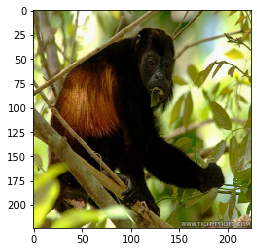

In [77]:
i=1
for img_name in X.Filename:
    if i==1:
      img = plt.imread(img_name)
      new_img = resize(img, (224, 224, 3))
      print(img_name)
      plt.imshow(new_img)
      i=0
    else:
       break;

In [83]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X['Label']= label_encoder.fit_transform(X['Label'])

In [124]:
y = X.Label

In [79]:
Z.shape

(1097, 224, 224, 3)

In [125]:
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1067    9
1068    9
1069    9
1070    9
1071    9
1072    9
1073    9
1074    9
1075    9
1076    9
1077    9
1078    9
1079    9
1080    9
1081    9
1082    9
1083    9
1084    9
1085    9
1086    9
1087    9
1088    9
1089    9
1090    9
1091    9
1092    9
1093    9
1094    9
1095    9
1096    9
Name: Label, Length: 1097, dtype: int32

In [140]:
from keras.utils import to_categorical

y = to_categorical(y)
y.shape

(1097, 10)

In [141]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [142]:
Z.min(),Z.max()

(-1.0, -0.9921568627450981)

In [88]:
from keras.applications.vgg16 import preprocess_input

In [143]:
Z = preprocess_input(Z, mode='tf')

In [144]:
Z.min(),Z.max()

(-1.007843137254902, -1.0077816224529028)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
Z_train, Z_valid, y_train, y_valid = train_test_split(Z, y, test_size=0.3, random_state=42)

In [128]:
from keras.applications.vgg16 import VGG16

In [95]:
base_model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 420s 1us/step


In [147]:
base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

In [148]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [149]:
base_model_pred = base_model.predict(Z_train)
base_model_pred_valid = base_model.predict(Z_valid)

In [150]:
base_model_pred.shape

(767, 7, 7, 512)

In [151]:
base_model_pred = base_model_pred.reshape(767, 7*7*512)

In [152]:
base_model_pred_valid.shape

(330, 7, 7, 512)

In [153]:
base_model_pred_valid = base_model_pred_valid.reshape(330, 7*7*512)

In [156]:
base_model_pred.max()

9.5297365

In [158]:
max_val = base_model_pred.max()

base_model_pred = base_model_pred / max_val
base_model_pred_valid = base_model_pred_valid / max_val

In [165]:
base_model_pred_valid.min(), base_model_pred_valid.max()

(-0.0, 1.000001)

In [160]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [161]:
#create a sequential model 
model = Sequential()
# add input layer to the model that accepts input of shape 7*7*512
model.add(InputLayer((7*7*512, )))
# add fully connected layer with 1024 neurons and relu activation
model.add(Dense(units=1024, activation='relu'))
# add fully connected layer with 2 neurons and relu activation
model.add(Dense(units=10, activation='softmax'))

In [162]:
model.compile(optimizer='sgd', metrics=['accuracy'], loss='categorical_crossentropy')

In [163]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10250     
Total params: 25,701,386
Trainable params: 25,701,386
Non-trainable params: 0
_________________________________________________________________


In [167]:
model.fit(Z_train, y_train, epochs=30, validation_data=(Z_valid, y_valid))

ValueError: Error when checking input: expected input_8 to have 2 dimensions, but got array with shape (767, 224, 224, 3)

In [116]:
predictions = model.predict_classes(base_model_pred_valid)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [166]:
scores = model.evaluate(base_model_pred_valid, y_valid, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

330/330 [==============================] - 0s 1ms/step
Test loss: 2.306190677122636
Test accuracy: 0.07878787815570831
